# Capstone project

1. Discussion and introduction to the business problem;
2. A description of the data and how it will be used to solve the problem
3. Target audience;
4. Data analysis;
5. Results and conclusion;




## 1. Discussion and introduction to the business problem

London is one of the financial cities in the world, with its gross regional product of £500 bil. it forms a quarter of the UKs GDP. It also happens to be one of the most populated and diverse with it's 9.3 mil and 37% foreign born. It is a perfect place to start your business. The finance industry is located in the following districts: the City, Westminster, Canary Wharf, Camden & Islington and Lambeth & Southwark. These are the areas we will be focusing on. The idea is to open a place that serves lunch to the nearby office employees. Due to the high density of office buliding the flow of customers would be colossal.

Further in the project we will look at the current available restaurants in the areas, it's speciality and condensity using the Forsquare application, projecting it on to the map for a more convenient view. Based on the analysis, we will detemine the indicators that will allow to make a decission on the future joint.

## 2. A description of the data and how it will be used to solve the problem

Using Wikipedia, i will export the districts that interest us, and connect the database with Forsquare using the postal codes. Having the list of venues per area, I will be able to rank them and distinguish the most popular types per area, and the venue quantity. It will be visually represented by a chart to highlight the findings. Using the geograhical coordinates i will project the points on the map to review the proximity of the venues to each other. 
Having all this information, i plan to create clusters of venues by cusine type to see if there are preferences to a specific cusine in a district.

## 3. Target audience

1. Investors looking to open a new restaurant;
2. Office workers looking for a place to eat in;
3. Restaurant owners in the areas to check for competitors;




## 4. Data analysis

### 4.1 Preparation for the analysis 
Lets start with downloading the necessary libraries for our project. We will be using wikipedia data to get the districts and their coordinates and Foursquare to import the venues in the vicinity. That is why we need geopy library. As we want to plot graphs and project our findings on the map, we need to install matplotlib and folium. The two basic libraries to use are numpy and pandas to have our data presented in tables.

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

### 4.2 Data extraction
I will use the read_html function which allows to read data from links, and chose the table availabe with a list of all districts in Greater London. We will filter only the areas we are interested in, to analyse. I took 4 districts which are Camden town, Canary Wharf, Lambeth and Islington.

In [4]:
#use the fuction read_html to get the data from the website as a table
df=pd.read_html('https://en.wikipedia.org/wiki/List_of_areas_of_London')[1]

In [5]:
df=df[df['Location'].isin(['Canary Wharf','Islington','Camden Town','Lambeth'])]

In [6]:
df.head()

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
76,Camden Town,Camden[40],LONDON,NW1,020,TQ295845
77,Canary Wharf,Tower Hamlets[40],LONDON,E14,020,TQ375802
258,Islington,Islington,LONDON,N1,020,TQ315845
275,Lambeth,Lambeth,LONDON,SE1,020,TQ305785


### 4.3 Data formating 
As we can see the coordinates we got are provided by Ordnance Survery (OS) which use military precission to specify the location. For our purposes we require latitude and logitude format, that is why I downloaded a converter OSGridConverter and used the function grid2latlong to get the info required for the project.

In [7]:
!pip install OSGridConverter


In [8]:
from OSGridConverter import grid2latlong
NW1=grid2latlong('TQ295845')
E14=grid2latlong('TQ375802')
N1=grid2latlong('TQ315845')
SE1=grid2latlong('TQ305745')
lat=NW1.latitude,E14.latitude,N1.latitude,SE1.latitude
lon=NW1.longitude,E14.longitude,N1.longitude,SE1.longitude


In [9]:
df['Latitude']=lat

In [10]:
df['Longitude']=lon

In [11]:
df

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref,Latitude,Longitude
76,Camden Town,Camden[40],LONDON,NW1,020,TQ295845,51.544548,-0.133398
77,Canary Wharf,Tower Hamlets[40],LONDON,E14,020,TQ375802,51.504018,-0.019683
258,Islington,Islington,LONDON,N1,020,TQ315845,51.544086,-0.104549
275,Lambeth,Lambeth,LONDON,SE1,020,TQ305785,51.454452,-0.122673


### 4.4 Areas of analysis

Now that we have all our data set, lets take a look at the area location on the map to 

In [12]:
address = 'London,UK'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [13]:
# create map of London
map_London = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, location in zip(df['Latitude'], df['Longitude'], df['Location']):
    label = '{}'.format(location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

### 4.5 Using Foursquare to analyse our data

Lets connect to the Foursquare API, we input our credentials, based on the profile the quality of information can vary, for our purposes we can use the most basic one that can give the list of venues. Using the JSON library we can open the API with pandas and look at it as a table. I took 100 most popular venues in the 500m radius for the analysis. As the Foursquare aplication is constantly updated and is working live based on the call time, the result may vary depending on the time and day when the call has been made.

In [14]:
#Connect to Forsquare
CLIENT_ID = 'ZV4GNWDOT0PJWWZQPMIBJKMRIK2XR4PIQ0KVP0GPQB4RXNPB' # your Foursquare ID
CLIENT_SECRET = 'ZT42LZA22OKCKEQNOG4QXLF53UX2M0TIN1PZEEWIPYFYLFLU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZV4GNWDOT0PJWWZQPMIBJKMRIK2XR4PIQ0KVP0GPQB4RXNPB
CLIENT_SECRET:ZT42LZA22OKCKEQNOG4QXLF53UX2M0TIN1PZEEWIPYFYLFLU


In [15]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
#Creating the URL for the extraction of the venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
London_venues = getNearbyVenues(names=df['Location'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

London_venues.head()

Camden Town
Canary Wharf
Islington
Lambeth


,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Camden Town,51.544548,-0.133398,Camden Square,51.544894,-0.131536,Park
1,Camden Town,51.544548,-0.133398,London Irish Centre,51.543782,-0.132503,Event Space
2,Camden Town,51.544548,-0.133398,The Lord Stanley,51.547209,-0.129508,Pub
3,Camden Town,51.544548,-0.133398,Pritchard & Ure,51.541260,-0.135176,Coffee Shop
4,Camden Town,51.544548,-0.133398,Colonel Fawcett,51.541923,-0.136065,Pub


In [78]:
London_restaurants=London_venues[London_venues['Venue Category'].str.contains('Pub|Restaurant|Café|Food|Sandwich|Burger|Steakhouse|Pizza')].reset_index(drop=True)


As we can see from the table above, the venues include not only food places, but also gyms, parks, arenas, airports, etc. For the analysis, i filtered only the places where you can have lunch based on the venue category. As pubs play a lage role in British culture and are often used for having lunch, i included that category in our analysis. Lets take a look at how many venues per location we have.

In [44]:

London_gr=London_restaurants.groupby('Location').count()

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0, 0.5, 'Quantity')

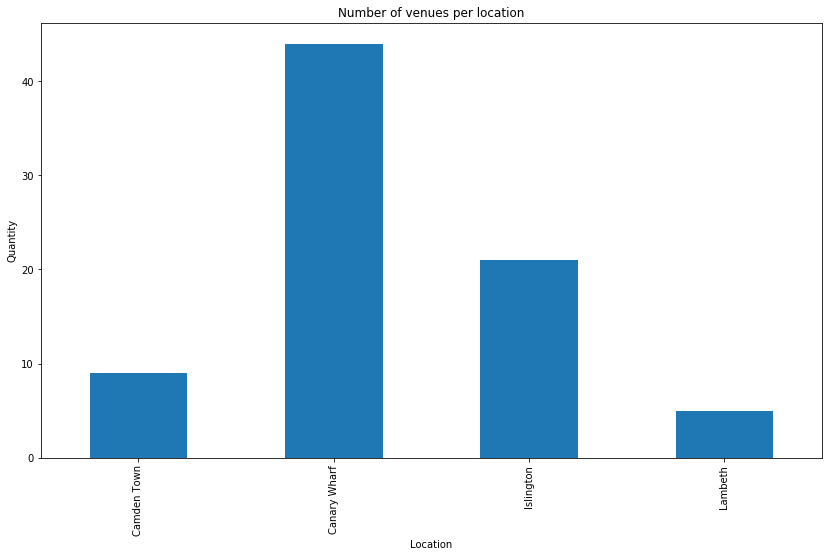

In [22]:
chart= London_gr['Venue']
chart.plot(kind='bar',figsize=(14, 8))
plt.title('Number of venues per location')
plt.ylabel('Quantity')

Based on the bar chart we can see that the spread of food venues is uneven and Canary Wharf area has an abundance of venues in close proximity, while Lambeth only has 5. Lets take a closer look at what kind of food is available each area. Using the matplot library i added the popups with the venue names and categories on the map to see the density.

In [57]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [77]:
venues_map = folium.Map(location=[51.5074, -0.1278], zoom_start=12.3)

Locations=['Canary Wharf','Camden Town','Islington','Lambeth']

rainbow=['red','yellow','blue','green']
x=np.arange(len(Locations))

for lat, lng, label, loc, cat in zip(London_restaurants['Venue Latitude'], London_restaurants['Venue Longitude'], London_restaurants['Venue'],London_restaurants['Location'], London_restaurants['Venue Category']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color=rainbow[Locations.index(loc)-1],
        label=str(label)+','+str(loc),
        popup=folium.Popup(str(label)+','+str(cat), parse_html=True),
        fill = True,
        fill_color=rainbow[Locations.index(loc)-1],
        fill_opacity=0.6
    ).add_to(venues_map)
    
venues_map

In [25]:
#Sorting the results based on the venue type
# one hot encoding
London_onehot = pd.get_dummies(London_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
London_onehot['Location'] = London_restaurants['Location'] 
# move neighborhood column to the first column

fixed_columns = [London_onehot.columns[-1]] + list(London_onehot.columns[:-1])
London_onehot = London_onehot[fixed_columns]

In [27]:
London_grouped = London_onehot.groupby('Location').mean().reset_index()
London_grouped

,Location,Asian Restaurant,Burger Joint,Café,Caribbean Restaurant,Dumpling Restaurant,Eastern European Restaurant,English Restaurant,Falafel Restaurant,Food Truck,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Modern European Restaurant,Pizza Place,Pub,Ramen Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Spanish Restaurant,Steakhouse,Street Food Gathering,Sushi Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Camden Town,0.111111,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.111111,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,Canary Wharf,0.022727,0.113636,0.068182,0.000000,0.022727,0.000000,0.022727,0.022727,0.022727,0.022727,0.022727,0.045455,0.090909,0.022727,0.022727,0.022727,0.022727,0.000000,0.022727,0.045455,0.136364,0.000000,0.022727,0.068182,0.022727,0.045455,0.045455,0.0,0.022727
2,Islington,0.047619,0.000000,0.285714,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.047619,0.047619,0.0,0.047619
3,Lambeth,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000


Lets chose the top 5 most frequent venues in each location using the grouped function based on location and taking the mean average.

In [28]:

num_top_venues = 5

for hood in London_grouped['Location']:
    print("----"+hood+"----")
    temp = London_grouped[London_grouped['Location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Camden Town----
                  venue  freq
0                   Pub  0.33
1                  Café  0.22
2      Asian Restaurant  0.11
3           Pizza Place  0.11
4  Caribbean Restaurant  0.11


----Canary Wharf----
                venue  freq
0      Sandwich Place  0.14
1        Burger Joint  0.11
2  Italian Restaurant  0.09
3                Café  0.07
4          Steakhouse  0.07


----Islington----
                venue  freq
0                Café  0.29
1                 Pub  0.29
2  Italian Restaurant  0.14
3    Asian Restaurant  0.05
4  Turkish Restaurant  0.05


----Lambeth----
                           venue  freq
0                    Pizza Place   0.2
1  Vegetarian / Vegan Restaurant   0.2
2           Caribbean Restaurant   0.2
3              Indian Restaurant   0.2
4                            Pub   0.2




In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

To visualise it a bit better, lets convert it into a table with the 5 most common venues.

In [30]:
#Converting the list into a table
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locations_venues_sorted = pd.DataFrame(columns=columns)
Locations_venues_sorted['Location'] = London_grouped['Location']

for ind in np.arange(London_grouped.shape[0]):
    Locations_venues_sorted.iloc[ind, 1:] = return_most_common_venues(London_grouped.iloc[ind, :], num_top_venues)

Locations_venues_sorted.head()

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Camden Town,Pub,Café,Asian Restaurant,Italian Restaurant,Caribbean Restaurant
1,Canary Wharf,Sandwich Place,Burger Joint,Italian Restaurant,Steakhouse,Café
2,Islington,Café,Pub,Italian Restaurant,Vietnamese Restaurant,Seafood Restaurant
3,Lambeth,Caribbean Restaurant,Pub,Pizza Place,Vegetarian / Vegan Restaurant,Indian Restaurant


Based on this table we can see that Lambeth put Carribean Restaurant as most common, which is not very accurate, as Lambeth only has 5 venues, all of them have the same frequency of 20%, so it was listed first based on the order provided by Foresquare.

In [31]:
Venue_top=London_restaurants.groupby('Venue Category').count()
Venue_top.sort_values(by='Location', ascending=True, axis=0, inplace=True)

Lets see what is the most popular place after all in all of the 4 districts we have been looking into. What is the most common venue?

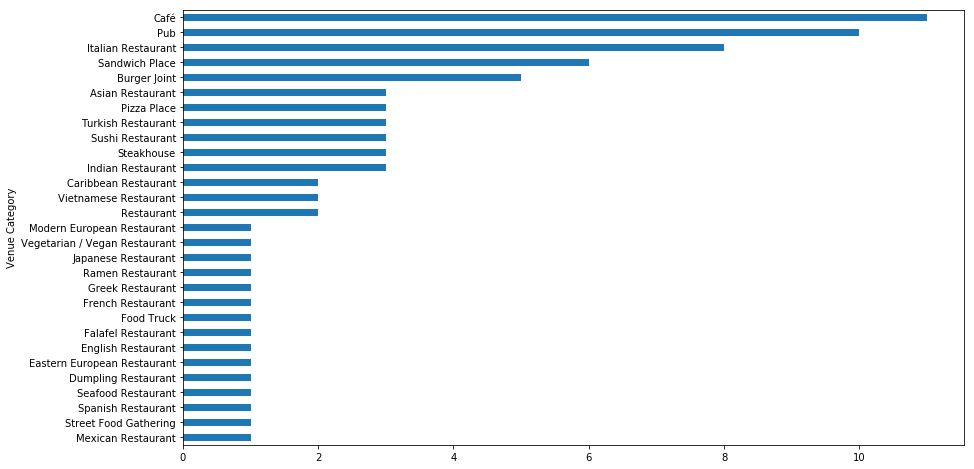

In [32]:
name2= Venue_top['Location']
name2.plot(kind='barh',figsize=(14,8))

A simple Cafe turns out to be the most common venue, followed close by a pub and italian restaurant on the third place.

## 5 Results and conclusions

The aim of the project was to look into the perspective of opening a restaurant or a food place in one of the business centers in London. We took a close look at 4 busiest districts Canary Wharf, Camden Town, Islington and Lambeth. Used matplot and geopy libraries and using Wikipedia and Foursquare this is what we found out:
- Canary Wharf is overpipulated with places to eat, Lambeth on the other hand is lacking variety with only 5 places;
- Cafe is the most frequent venue as it's very common to have a sandwich with coffee for lunch in the UK;
- Pubs are the second most popular venue and is most visited in Lambeth, Camden Town and seconfd most visited in Islington;
- Specialised joints are not very common, even in such a multicultural city as London, Pizza places and Italian Restaurants are the only exception they stand on the third position of popularity;


As a conclusion, as a potential investor I would take a notice that Pubs which are very popular in other districts are completely missing in Canary Wharf. Which could result in a potential attraction to workers. On the other hand there are so many other joints in Canary Wharf, that the competition would be very severe if opening any other types of venues.
Lambeth is a district where you can potentially set up your food business as there are not many options there, and it's quite isolated from the other districts.
As London is a very expensive city with the rent prices being one of the highest in the world, i would take caution and investigate further propery values with landlords and do another project on comparison.
